Hello my friend!
This code is about regeneration of a picture using the genetic algorithm.
Bare with me..
We added all the necessary libraries:
1.   cv2 for reading the image as an numpy array
2.   matplotlib for ploting our generated *picture*
3. numpy very useful in terms of calculation and manupilating the data
4. random for generating random cromosomes for parents
5. tenserflow for running out program in GPU instead of CPU

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf 
dev = tf.test.gpu_device_name()
dev

'/device:GPU:0'

*   uploading our image into the google colab space



In [2]:
from google.colab import files
from IPython.display import Image
upload = files.upload()

Saving turing.jpg to turing.jpg


*  we want to simplify the collected data due to the insufficient equipments for running a huge dataset, so we only obtain 64 pixel of each row and column of the picture. 

*  Then we read the picture with .imread() & then resize it.
after that we want to make sure we convert the RGB image to GRAY scale picture.

*  At the end we define our population size which is the number of generated genomes in each round of generation. -Another thing we want to do is to convert out 2D array into a 1D array for calculation simplification.

*  The genes are all possible values a pixel can get.

In [3]:
IMG_DIMS = 64
TOTAL_NUM_PIXEL = IMG_DIMS*IMG_DIMS

# read the image file
image = cv2.imread('turing.jpg')
# resize the image to desired dimensions
image = cv2.resize(image, (IMG_DIMS, IMG_DIMS))
# convert image to grayscale: (img_dims, img_dims, 3) array becomes (img_dims, img_dims)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
population_size = 100
TARGET = gray_image.flatten()
genes = np.array(range(0, 256, 1))


### **All the functions we need for the project:**



*   mutated_genes: chooses a random value a pixel can obtain.
*   create_random_matrix: creates a random chromosome for two parents.
*   cal_fitness: evaluates the child with our target array. if the same, returns 0, if not, the more it gets means we are still far away from our goal.
*   mate: creates a child from the parents chromosome.
by having a random probability, the chromosomes are chosen either from one of the parents or they are mutated! This function is working both for *CROSS OVER & MUTATION & DOMINATION!*
*   which_better, index_value: returns all the correct found answers out of the parents genes. This functions are nominated as dominant genes selection!

In [4]:
def mutated_genes():
    global genes
    gene = random.choice(genes)
    return gene

def create_random_matrix():
    return np.random.randint(255, size=(TOTAL_NUM_PIXEL))

def cal_fitness(child):
    global TARGET
    fitness = 0
    for gs, gt in zip(child, TARGET):
        if gs != gt:
            fitness += 1
    return fitness

def mate(par1, par2):
    child_chromosome = []
    for gp1, gp2 in zip(par1, par2):
        prob = random.random()

        if prob < 0.35:
                child_chromosome.append(gp1)
        elif prob < 0.7:
                child_chromosome.append(gp2)
        else:
            child_chromosome.append(mutated_genes())
    proba = random.random()
    if proba < 0.95:
      for i,j in index_value(p1,p2):
        child_chromosome[i]=j

    return child_chromosome

def which_better(parent):
  global TARGET
  n1 = []
  index = 0
  for gs, gt in zip(parent, TARGET):
    if gs == gt:
      nf = [index, gt]
      n1.append(nf)
    index += 1
  return n1

def index_value(parent1, parent2):
  n1 = which_better(parent1)
  n2 = which_better(parent2)
  n0 = []
  for i in n2:
    n0.append(i)
  for j in n1:
    n0.append(j)
  n0 = sorted(n0)
  return n0



*   This is our main function code:


*   In the first generation, a range of 100(population size) matrix or genomes are created. then with a simple conditional statement, the fitness function guide us whether we have to do further calculations or we have reached our goal. If not, this While loop will continue to run.
*   also each time new generation is created the pervious ones are printed on the console to show the diferentiation of our chromosomes.


In [5]:
generation = 1
found = False
population = []
for _ in range(population_size):
    population.append(create_random_matrix())

while not found:
    population = sorted(population, key=cal_fitness)

    if cal_fitness(population[0]) <= 0:
        found = True
        print('sentencee: {}'.format(population[0]))
        break

    new_generation = []
    n = int(population_size)
    for _ in range(n):
        p1 = random.choice(population[:50])
        p2 = random.choice(population[:50])
        child = mate(p2, p1)
        new_generation.append(child)   

    population += new_generation + population[:40]
    generation += 1
    print("generation({})\t{}".format(generation, population[0]))
    print(cal_fitness(population[0]))


generation(2)	[155  39 176 ...  94  14  77]
4068
generation(3)	[155, 39, 98, 100, 116, 58, 188, 228, 52, 190, 143, 28, 215, 140, 143, 226, 78, 86, 202, 247, 162, 88, 152, 129, 219, 51, 222, 231, 205, 99, 240, 22, 188, 115, 198, 4, 220, 149, 7, 183, 146, 82, 168, 29, 222, 171, 199, 185, 27, 37, 150, 183, 207, 88, 150, 170, 150, 26, 229, 94, 134, 176, 224, 134, 221, 138, 134, 222, 46, 149, 183, 245, 93, 142, 59, 38, 34, 253, 169, 233, 106, 228, 120, 39, 228, 93, 44, 59, 228, 194, 38, 200, 35, 72, 12, 253, 69, 243, 233, 185, 70, 59, 10, 237, 145, 169, 228, 66, 242, 33, 134, 190, 5, 120, 30, 241, 4, 125, 174, 209, 25, 112, 185, 46, 193, 218, 104, 157, 138, 20, 223, 194, 111, 246, 102, 10, 110, 215, 126, 47, 53, 56, 171, 105, 228, 93, 14, 73, 46, 83, 228, 201, 102, 149, 93, 231, 149, 34, 169, 100, 158, 202, 22, 116, 196, 212, 96, 24, 130, 67, 132, 219, 43, 97, 212, 200, 164, 118, 94, 11, 48, 235, 91, 22, 161, 99, 33, 28, 215, 81, 172, 79, 116, 203, 75, 0, 151, 103, 103, 182, 160, 146, 143, 



*   After finding the correct answer we need to convert our array to a picture.
We reshape our array from 1D to 2D.
At last, print both the target image and the out put image to show the accuracy of our result.


*   HASTA LA LUEGO MI AMIGO! ;)



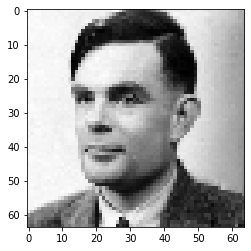

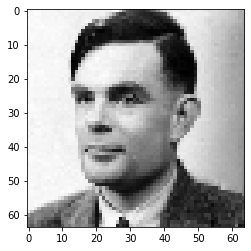

In [6]:
my_array = np.array(population[0])
genetic_image = np.reshape(my_array,(-1, IMG_DIMS))
plt.imshow(gray_image, cmap="gray")
plt.show()
plt.imshow(genetic_image, cmap="gray")
plt.show()